## Hilbert Huang transform for georadar

In [371]:
import numpy
import matplotlib
from pyhht import EMD
from pyhht.visualization import plot_imfs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [372]:
data=loadtxt('CAPA_3.txt',skiprows=1)

In [373]:
data2=zeros(256)
data2=data.reshape(256)


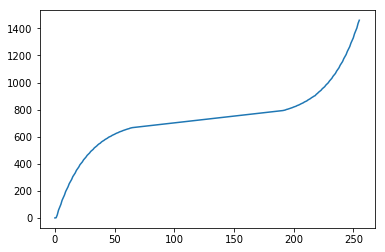

In [374]:
plot(data2)

In [375]:
data3=loadtxt('1605a.txt',skiprows=1)

In [376]:
print max(data3[:,2])

254.0


In [377]:
print min(data3[:,2])

0.0


In [378]:
print max(data3[:,0]),min(data3[:,0]),max(data3[:,1]),min(data3[:,1])

199.0 0.0 255.5 0.0


In [379]:
x=arange(0,200)
y=arange(0,256,0.5)
shape(y)

(512L,)

In [380]:
ix=200 
iy=512

In [381]:
z=zeros(ix*iy).reshape(iy,ix)

In [382]:

k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data3[k,2])
        # G[i,j]=data2[int(z[i,j])]
 
        k=k+1
        
        

In [383]:
G=zeros(ix*iy).reshape(iy,ix)
Ghh=zeros(ix*iy).reshape(iy,ix)
fy=zeros(iy)

In [384]:
# convert logarithm to signal 
k=0
for j in range(ix):
    for i in range(iy):
        #z[i,j]=float(data3[k,2])
        G[i,j]=data2[int(z[i,j])]

        k=k+1
        

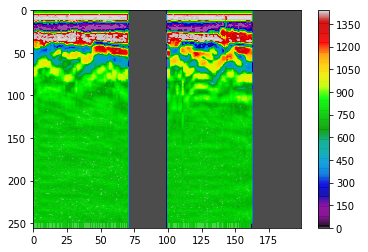

In [385]:
ylim(255.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('z.png')

### Hilbert Huang transfor

In [386]:
fy=G[20:,10]-mean(G[20:,10])
decomposer = EMD(fy)
imfs = decomposer.decompose()
shape(imfs)

(7L, 492L)

2
3
4
5
6
7


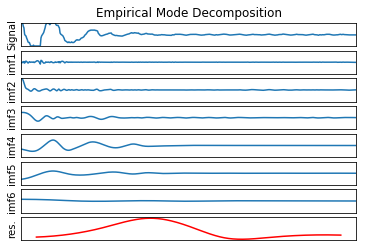

In [387]:
plot_imfs(fy, imfs, y[:-20]) 

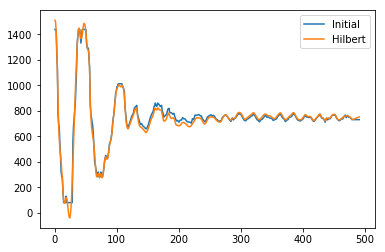

In [388]:
plot(G[20:,10],label="Initial")
plot (G[20:,10]-imfs[6,:]-imfs[0,:],label="Hilbert")
legend()

In [393]:
for i in range(70): #range(ix):
    fy=G[20:,i]-mean(G[20:,i])
    decomposer = EMD(fy)
    imfs = decomposer.decompose()
    #print i,shape(imfs)
    ns=shape(imfs)[0]-1
    fy[:]=G[20:,i]-imfs[0,:]-imfs[ns,:]
    Ghh[20:,i]=fy[:]
        

Mode 5, Iteration 600
0 minima > 0; 6 maxima < 0.
Mode 6, Iteration 600
0 minima > 0; 2 maxima < 0.
Mode 3, Iteration 600
0 minima > 0; 23 maxima < 0.
Mode 4, Iteration 800
0 minima > 0; 17 maxima < 0.


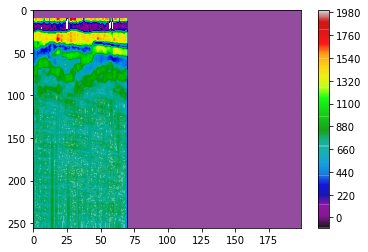

In [398]:
ylim(255.5,0)
levels = arange(-100.,2010,10)
contourf(x,y,Ghh,levels,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gb.png')

NameError: name 'Gh' is not defined

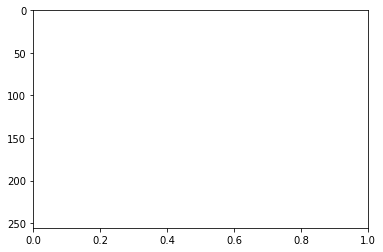

In [391]:
#преобразование Гильберта (для определения среды)
ylim(255.5,0)
lim=arange(0,900,10)
contourf(x,y,Gh,lim,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gh.png')

In [ ]:
# Производная
Gp=zeros(ix*iy).reshape(iy,ix)
for j in range(iy-1):
    Gp[j,:]=Gh[j+1,:]-Gh[j,:]


In [ ]:
vMin=zeros(ix)
vMax=zeros(ix)
for i in range(ix):
    vMin[i]=min(Gp[:,i])
    vMax[i]=max(Gp[:,i])


In [ ]:
lim=arange(-30,50,1)
ylim(255.0,0)
contourf(x,y,Gp,lim,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gp.png')